### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

### Load and Explore Data

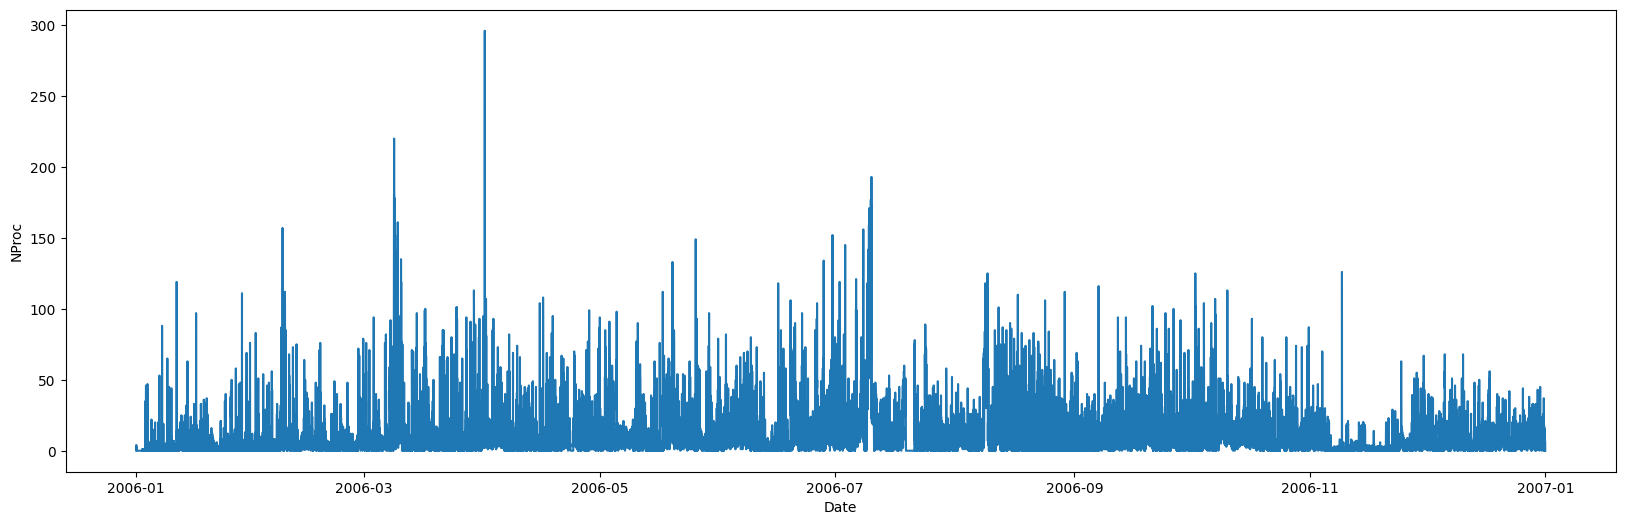

In [5]:
# Load the dataset
df = pd.read_csv('../data/processed.csv')

#set the date as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot the data to visualize the time series
plt.figure(figsize=(20,6))
plt.plot(df.index, df['NProc'])
plt.xlabel('Date')
plt.ylabel('NProc')
plt.show()

### Data Preprocessing

In [7]:
# Define discrete classes or bins for NProc
# You can adjust the number of bins based on your data distribution
num_bins = 10
df['NProc_class'] = pd.cut(df['NProc'], bins=num_bins, labels=False)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df['NProc_scaled'] = scaler.fit_transform(df[['NProc']])

# Create sequences for training
sequence_length = 10
X, y = [], []

for i in range(len(df) - sequence_length):
    X.append(df['NProc_scaled'].values[i:i+sequence_length])
    y.append(df['NProc_class'].values[i+sequence_length])

X, y = np.array(X), np.array(y)

# Reshape input data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Convert class labels to one-hot encoding
y_one_hot = to_categorical(y)

### Train-Test Split

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

### Build LSTM Model

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(num_bins, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# add early stopping to prevent overfitting
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/50


876/876 [==============================] - 12s 11ms/step - loss: 0.3395 - accuracy: 0.9267 - val_loss: 0.2660 - val_accuracy: 0.9295
Epoch 2/50
876/876 [==============================] - 10s 11ms/step - loss: 0.2670 - accuracy: 0.9284 - val_loss: 0.2497 - val_accuracy: 0.9303
Epoch 3/50
876/876 [==============================] - 9s 10ms/step - loss: 0.2532 - accuracy: 0.9293 - val_loss: 0.2386 - val_accuracy: 0.9315
Epoch 4/50
876/876 [==============================] - 8s 9ms/step - loss: 0.2409 - accuracy: 0.9303 - val_loss: 0.2314 - val_accuracy: 0.9335
Epoch 5/50
876/876 [==============================] - 9s 10ms/step - loss: 0.2364 - accuracy: 0.9306 - val_loss: 0.2277 - val_accuracy: 0.9322
Epoch 6/50
876/876 [==============================] - 8s 10ms/step - loss: 0.2346 - accuracy: 0.9300 - val_loss: 0.2273 - val_accuracy: 0.9336
Epoch 7/50
876/876 [==============================] - 9s 10ms/step - loss: 0.2342 - accuracy: 0.9312 - val_loss: 0.2304 - val_accuracy: 0.9

In [11]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on Test Data: {accuracy}')

219/219 [==============================] - 2s 9ms/step - loss: 0.2251 - accuracy: 0.9348
Accuracy on Test Data: 0.9347702264785767
